# Plots for experiment 14


Oddity experiment detecting blurred images with lower blur levels compared to expt 13.

In [12]:
import numpy as np
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipythonjournal as journal
import data_helpers as helpers
import scipy as sp
import itertools

%load_ext autoreload
%autoreload 2

%pylab inline

# set some styles we like:
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("paper")

# set up the figure path:
top_dir = helpers.project_directory()
fig_dir = os.path.join(top_dir, 'figures')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [13]:
# load data (after running /code/analysis/data_munging.py/):
dat = pd.read_csv(os.path.join(top_dir, 'results', 'experiment-14', 'all_data.csv'), index_col=False)

# rename surround_cond to "surround":
dat.rename(columns={'surround_cond': 'surround'}, inplace=True)

# make a log blur scale:
dat.loc[:, 'log_blur'] = np.log(dat.loc[:, 'blur_sigma'])
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700 entries, 0 to 1699
Data columns (total 20 columns):
surround         1700 non-null object
oddball          1700 non-null int64
im_code          1700 non-null object
target_loc       1700 non-null int64
jitter_1         1700 non-null float64
jitter_2         1700 non-null float64
jitter_3         1700 non-null float64
subj             1700 non-null object
session          1700 non-null int64
eccent           1700 non-null int64
patch_size_px    1700 non-null int64
size             1700 non-null float64
blur_sigma       1700 non-null float64
test_location    1700 non-null object
rand_seed        1700 non-null float64
trial            1700 non-null int64
response         1700 non-null int64
rt               1700 non-null float64
correct          1700 non-null float64
log_blur         1700 non-null float64
dtypes: float64(9), int64(7), object(4)
memory usage: 278.9+ KB


In [14]:
dat.groupby(['subj', 'blur_sigma']).size()

subj  blur_sigma
S1    0.4           200
      0.6           200
      0.8           200
      1.0           300
      2.0           100
      4.0           100
S10   0.4           100
      0.6           100
      0.8           100
      1.0           100
      2.0           100
      4.0           100
dtype: int64

In [15]:
dat['log_blur'].describe()

count    1700.000000
mean       -0.046582
std         0.695509
min        -0.916291
25%        -0.510826
50%        -0.223144
75%         0.000000
max         1.386294
Name: log_blur, dtype: float64

In [16]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700 entries, 0 to 1699
Data columns (total 20 columns):
surround         1700 non-null object
oddball          1700 non-null int64
im_code          1700 non-null object
target_loc       1700 non-null int64
jitter_1         1700 non-null float64
jitter_2         1700 non-null float64
jitter_3         1700 non-null float64
subj             1700 non-null object
session          1700 non-null int64
eccent           1700 non-null int64
patch_size_px    1700 non-null int64
size             1700 non-null float64
blur_sigma       1700 non-null float64
test_location    1700 non-null object
rand_seed        1700 non-null float64
trial            1700 non-null int64
response         1700 non-null int64
rt               1700 non-null float64
correct          1700 non-null float64
log_blur         1700 non-null float64
dtypes: float64(9), int64(7), object(4)
memory usage: 278.9+ KB


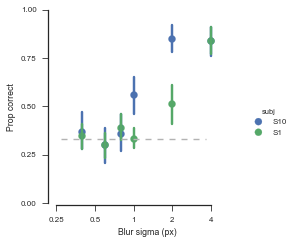

In [17]:
g = sns.lmplot("log_blur", "correct", dat, 
               x_estimator=np.mean, 
               hue="subj",
               logistic=True,
               fit_reg=False,
               ci=95,
               size=3.5)

# add a line showing chance:
for ax in g.axes.ravel():
    ax.plot((-1.3, 1.3), (0.33, 0.33), ls='--', color='0.7')

g.set_axis_labels("Blur sigma (px)", "Prop correct")
x_ticks = [0.25, 0.5, 1, 2, 4]
g.set(xticks=np.log(x_ticks),
      yticks=np.linspace(0, 1, num=5))
g.set_xticklabels(x_ticks)

# titles = ["S1"]

# for ax, title in zip(g.axes.flat, titles):
#     ax.set_title(title)

g.fig.subplots_adjust(wspace=0.5, hspace=0.7)
g.despine(offset=2, trim=True);

In [18]:
# g.savefig(os.path.join(fig_dir, 'expt_14_performance.pdf'))

## Binomial binning rather than bootstrapping

In [19]:
binned = helpers.binomial_binning(dat, ['subj', 'log_blur'])
binned

,subj,log_blur,n_successes,n_trials,prop_corr,ci_min,ci_max,error_min,error_max
0,S1,-0.916291,70,202,0.346535,0.282593,0.413355,0.063941,0.066820
1,S1,-0.510826,61,202,0.301980,0.240767,0.366908,0.061214,0.064928
2,S1,-0.223144,79,202,0.391089,0.325057,0.459164,0.066032,0.068075
3,S1,0.000000,101,302,0.334437,0.282398,0.388553,0.052039,0.054116
4,S1,0.693147,52,102,0.509804,0.413283,0.605960,0.096520,0.096156
5,S1,1.386294,85,102,0.833333,0.755527,0.898782,0.077806,0.065448
6,S10,-0.916291,38,102,0.372549,0.281765,0.468069,0.090784,0.095520
7,S10,-0.510826,31,102,0.303922,0.218979,0.396147,0.084943,0.092226
8,S10,-0.223144,37,102,0.362745,0.272665,0.457925,0.090080,0.095179
9,S10,0.000000,57,102,0.558824,0.462047,0.653414,0.096776,0.094590


In [20]:
def plot_chance(*args, **kwargs):
    data = kwargs.pop('data')
    plt.plot((np.log(0.25), np.log(4)), (0.33, 0.33), ls='--', color='0.7')
    
def plot_errors(*args, **kwargs):
    data = kwargs.pop('data')
    x_col, y_col = args
    errors = np.vstack([data.loc[:, 'error_min'], 
                        data.loc[:, 'error_max']])

    plt.errorbar(data.loc[:, x_col], 
                 data.loc[:, y_col], 
                 yerr=errors,
                 **kwargs);        

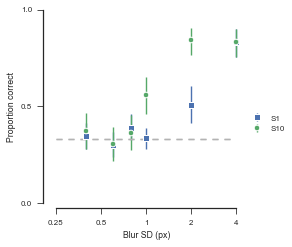

In [21]:
g = sns.FacetGrid(binned, hue='subj', 
                  hue_kws={'marker': ['s', 'o']},
                  dropna=False,
#                   palette=pal,
                  size=3.5)
g.map_dataframe(plot_chance)
g.map_dataframe(plot_errors, 'log_blur', 'prop_corr',
                linestyle='none', 
                mec='w', mew=1, capsize=0)
g.set_axis_labels('Blur SD (px)', 'Proportion correct')
x_ticks = [0.25, 0.5, 1, 2, 4]
g.set(xticks=np.log(x_ticks),
      yticks=np.linspace(0, 1, num=3))
g.set_xticklabels(x_ticks)
g.add_legend(title='')

g.fig.subplots_adjust(wspace=0.5, hspace=0.7)
sns.despine(offset=5, trim=True);

In [22]:
g.savefig(os.path.join(fig_dir, 'expt_14_performance.pdf'))